In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
data=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

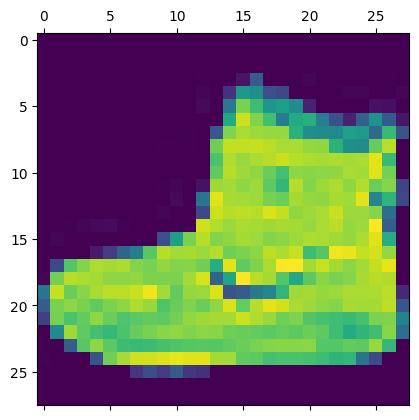

In [ ]:
plt.matshow(x_train[0])

In [ ]:
class_names[y_train[18]]

'Shirt'

In [ ]:
#reshape
#batch size,raw,column,colorchannel
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
#x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),strides=(2,2),padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,354 (270.91 KB)

 Trainable params: 69,354 (270.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history=model.fit(x_train,y_train,batch_size=100,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2589 - loss: 2.9386 - val_accuracy: 0.4647 - val_loss: 1.3846
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5273 - loss: 1.2275 - val_accuracy: 0.7108 - val_loss: 0.7705
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7212 - loss: 0.6989 - val_accuracy: 0.7875 - val_loss: 0.5267
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7941 - loss: 0.5388 - val_accuracy: 0.8460 - val_loss: 0.4349
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8342 - loss: 0.4523 - val_accuracy: 0.8621 - val_loss: 0.4007
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8493 - loss: 0.4140 - val_accuracy: 0.8491 - val_loss: 0.4065
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8584 - loss: 0.3900 - val_accuracy: 0.8716 - val_loss: 0.3515
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8616 - loss: 0.3722 - val_accuracy: 0.

In [ ]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

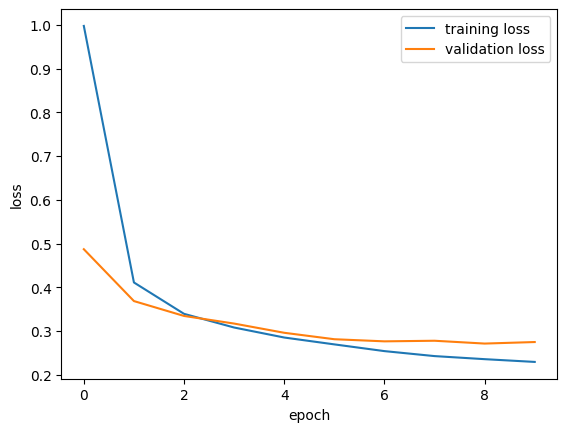

In [ ]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

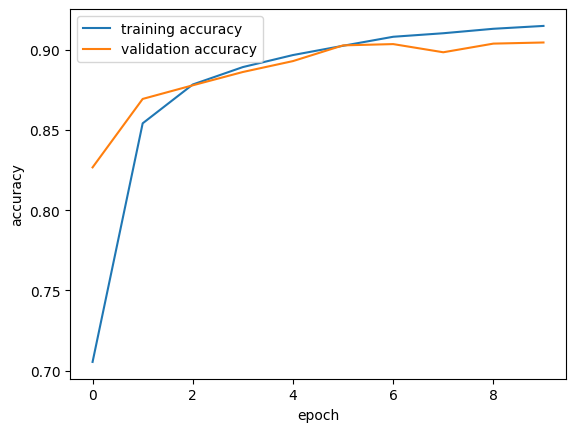

In [ ]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#

In [ ]:
def predict(index):
  plt.imshow(x_test[index]) #to display the image from the test dataset at the specified index
  predict_img=x_test[index].reshape((1,28,28,1))
  predict_prob=model.predict(predict_img)
  predict_class=np.argmax(predict_prob)
  print('true label',class_names[y_test[index]])
  print('predict label',class_names[predict_class])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
true label Sandal
predict label Sandal


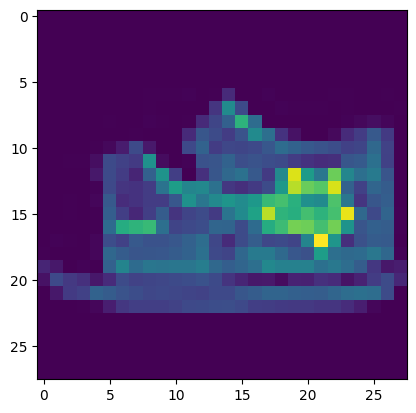

In [ ]:
predict(9999)